<a href="https://colab.research.google.com/github/MathewS424/PyTorch-Tutorial/blob/main/14_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT MNIST IMAGES - VIDEO 14**

In [37]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Convert MNIST IMAGE Files into a Tensor of 4 -Dimensions(no.of images, height, width, Colorr channel)
transform = transforms.ToTensor()

In [39]:
# Train Data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [40]:
# Test Data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [41]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [42]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [43]:
pwd

'/content'

In [44]:
ls

sample_data/


In [45]:
cd ../

/


In [46]:
pwd

'/'

In [47]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/   libx32@                   opt/         run/   tmp/
boot/      datalab/                    lib@    media/                    proc/        sbin@  tools/
cnn_data/  dev/                        lib32@  mnt/                      python-apt/  srv/   usr/
content/   etc/                        lib64@  NGC-DL-CONTAINER-LICENSE  root/        sys/   var/


In [48]:
cd cnn_data

/cnn_data


In [49]:
ls

MNIST/


In [50]:
cd ../

/


In [51]:
ls

bin@       cuda-keyring_1.0-1_all.deb  home/   libx32@                   opt/         run/   tmp/
boot/      datalab/                    lib@    media/                    proc/        sbin@  tools/
cnn_data/  dev/                        lib32@  mnt/                      python-apt/  srv/   usr/
content/   etc/                        lib64@  NGC-DL-CONTAINER-LICENSE  root/        sys/   var/


In [52]:
cd content/

/content


In [53]:
pwd

'/content'

**CONVOLUTIONAL AND POOLING LAYERS - VIDEO 15**

In [54]:
# Create a small batch size for images ..that is 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [55]:
# Define Our CNN Model
# Describe convolutional layer and what  its doing (2 convolutional layers)
# This is just am example in the next video we'll build out the actual model
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 =  nn.Conv2d(6, 16, 3, 1)  # we have not set padding parameters so the images becomes 26 X 26 it was 28 x 28 .
# becaues the boundry of the MINIST images are unusefull so its skipped the data of that boundry part and become 26x26(check output of In [26]:x.shape)
# Check Video -15 08:40

In [56]:
# Grab 1 MNIST RECORD/IMAGE
for i, (X_train, y_train) in enumerate(train_data):
  break

In [57]:
X_train.shape

torch.Size([1, 28, 28])

In [58]:
x = X_train.view(1, 1, 28, 28)

In [59]:
# Perform our first convolution
x = F.relu(conv1(x)) # Rectified Linear Unit for our activation function

In [60]:
# 1 images, 6 is the filter
x.shape   # How it becomes 26 x 26 anser is in In[20] or # Check Video -15 08:40

torch.Size([1, 6, 26, 26])

In [61]:
# pass through the pooling layer
x = F.max_pool2d(x, 2, 2) #kernel of 2 and stride of 2

In [62]:
x.shape  # 26 / 2 = 13

torch.Size([1, 6, 13, 13])

In [63]:
# Do our second Convolution
x = F.relu(conv2(x))

In [64]:
x.shape  #  we did not set any padding in conv2 so the img pixel was 13 x 13 reduce 2 becomes 11 x 11
# (reduced around outside of the images)

torch.Size([1, 16, 11, 11])

In [65]:
# Do another pooling layer
x = F.max_pool2d(x, 2, 2)  #kernel of 2 and stride of 2

In [66]:
x.shape  # 11 / 2 = 5.5 but we have to round down, because you can't invent data to round up

torch.Size([1, 16, 5, 5])

In [67]:
((28-2) / 2 -2) / 2  # order of reducing images from convolutional layer ,pooling layer to 5.5 pixel from 28 pixel initially

5.5

**CONVOLUTIONAL NEURAL NETWOORK MODEL -VIDEO - 16**

In [68]:
# Model class - above code together
class ConvolutionalNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    # 1st convolutional layer
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    # 2nd convolutional layer
    self.conv2 = nn.Conv2d(6, 16, 3, 1)

    # Fully connected Layer after Conv ,pooling layers its fully connected layer check image of CNN
    self.fc1 = nn.Linear(5*5*16, 120)  # 120,84,10 are randoms
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X, 2, 2)  # 2x2 kernel and stride of 2
    # Second pass
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X, 2, 2)

    # Re-View to flattten it out
    X = X.view(-1, 5*5*16)  # -1 SO THAT WE CAN VARY THE BATCH SIZE

    # Fully Connected Layers
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    x = self.fc3(X)

    return F.log_softmax(X, dim=1)

In [69]:
# Create an Instance of  our model
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [70]:
# Loss Function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # learning rate of 0.01 smaller lr ,longer its gonna take to train

**### Detailed Explanation of the Code Lines**

I'll explain each part of the code as if you're learning it for the first time, with a focus on what each line does, why certain parameters are used, and how the numbers fit into the overall picture.

#### [3] Convert MNIST IMAGE Files into a Tensor of 4-Dimensions

```python
transform = transforms.ToTensor()
```

- **What it does:** This line of code converts images into a tensor, which is a multi-dimensional array that PyTorch can process.
- **Why it's used:** The MNIST dataset images are originally in PIL format (Python Imaging Library), and we need to convert them into tensors so they can be used in deep learning models. Tensors allow the model to perform mathematical operations on the data.
- **4-Dimensions:** When we convert an image to a tensor, it becomes a 4D tensor of shape `(number of images, channels, height, width)`. For grayscale images like MNIST, the number of channels is 1.

#### [4] Train Data

```python
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)
```

- **What it does:** This line downloads the MNIST dataset and prepares it for training.
- **Parameters:**
  - `root='/cnn_data'`: Specifies the directory where the dataset will be stored.
  - `train=True`: Indicates that we are downloading the training set.
  - `download=True`: If the dataset isn't already in the specified directory, it will be downloaded.
  - `transform=transform`: Applies the transformation (conversion to tensor) to each image in the dataset.
  
#### [5] Test Data

```python
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)
```

- **What it does:** Similar to the training data, but this line downloads the test set.
- **Parameters:**
  - `train=False`: This specifies that we are downloading the test set.

#### [19] Create Data Loaders

```python
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)
```

- **What it does:** These lines create data loaders, which are tools that help load the data in batches for training and testing.
- **Parameters:**
  - `batch_size=10`: Specifies that each batch will contain 10 images. Smaller batches require less memory but take longer to train.
  - `shuffle=True`: Randomly shuffles the training data at every epoch to help the model generalize better.
  - `shuffle=False`: The test data is not shuffled because we want consistent results when evaluating the model.

#### [20] Define Convolutional Layers

```python
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)
```

- **What it does:** These lines define two convolutional layers in the neural network.
- **Parameters:**
  - `1`: The number of input channels. For MNIST, this is 1 because the images are grayscale.
  - `6` and `16`: The number of output channels (filters). Each filter will learn to detect different features in the image.
  - `3`: The size of the convolutional filter (3x3).
  - `1`: The stride, which indicates how the filter moves across the image. A stride of 1 means it moves 1 pixel at a time.

#### [22] Grab One Image from the Dataset

```python
for i, (X_train, y_train) in enumerate(train_data):
  break
```

- **What it does:** This code iterates over the dataset and breaks after getting the first image.
- **Why it's used:** We want to grab a single image to see what it looks like and to check its shape.

#### [24] Check Image Shape

```python
X_train.shape
```

- **What it does:** This line returns the shape of the image tensor.
- **Output:** For an MNIST image, this would be `[1, 28, 28]`, meaning 1 channel (grayscale), and 28x28 pixels in height and width.

#### [25] Reshape the Image

```python
x = X_train.view(1, 1, 28, 28)
```

- **What it does:** This reshapes the image to add an additional dimension, making it ready for the convolutional layer.
- **Parameters:**
  - `1, 1, 28, 28`: The shape of the tensor. The first `1` is the batch size, and the second `1` is the number of channels. The last two numbers are the height and width.

#### [26] Perform the First Convolution

```python
x = F.relu(conv1(x))
```

- **What it does:** Applies the first convolutional layer followed by a ReLU activation function.
- **Why ReLU:** ReLU (Rectified Linear Unit) introduces non-linearity to the model, allowing it to learn more complex patterns.

#### [27] Check Shape After Convolution

```python
x.shape
```

- **Output:** The shape is `[1, 6, 26, 26]`. The height and width reduce to 26x26 because the 3x3 filter reduces the image size by 2 pixels in each dimension.

#### [29] Apply Max Pooling

```python
x = F.max_pool2d(x, 2, 2)
```

- **What it does:** Applies a max pooling operation, which reduces the size of the image by taking the maximum value in each 2x2 region.
- **Parameters:**
  - `2, 2`: The size of the pooling filter and the stride. This reduces the image size by half.

#### [30] Check Shape After Pooling

```python
x.shape
```

- **Output:** The shape is `[1, 6, 13, 13]`, as the pooling operation reduces the dimensions by half.

#### [31] Perform the Second Convolution

```python
x = F.relu(conv2(x))
```

- **What it does:** Applies the second convolutional layer followed by ReLU activation.
- **Shape Reduction:** The output shape after this operation becomes `[1, 16, 11, 11]` because the filter reduces the dimensions further.

#### [33] Apply Second Max Pooling

```python
x = F.max_pool2d(x, 2, 2)
```

- **What it does:** Applies another max pooling operation to further reduce the size of the image.

#### [35] Check Final Shape

```python
x.shape
```

- **Output:** The final shape is `[1, 16, 5, 5]`, after all the convolution and pooling operations.

#### [40] Model Class

```python
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
```

- **What it does:** Defines a convolutional neural network (CNN) class with two convolutional layers.
- **Why Classes:** In PyTorch, models are usually defined as classes to organize layers and operations in a clean way.

#### [41] Create Model Instance

```python
torch.manual_seed(41)
model = ConvolutionalNetwork()
```

- **What it does:** Creates an instance of the model and sets a random seed for reproducibility.
- **Why Seed:** Setting a seed ensures that the results are reproducible, meaning you'll get the same results every time you run the code.

#### [42] Loss Function and Optimizer

```python
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
```

- **What it does:** Defines the loss function and the optimizer.
- **Parameters:**
  - `nn.CrossEntropyLoss()`: The loss function used for classification tasks, comparing the model's output with the true labels.
  - `torch.optim.Adam`: An optimizer that adjusts the model parameters to minimize the loss function.
  - `lr=0.001`: The learning rate, which controls how much to adjust the model parameters with each update. A smaller learning rate means more gradual learning.

### Summary
This code builds a basic Convolutional Neural Network (CNN) for the MNIST dataset. It includes data loading, model definition, and preparation for training by setting up the loss function and optimizer. Each step transforms the images and their dimensions, leading to the final structure that the model uses to make predictions.

**TRAIN AND TEST CNN MODEL - VIDEO 17**

In [71]:
import time
start_time = time.time()

# Create Variables To Tracks Things
epochs = 5
train_losses = []
train_correct = []
test_losses = []
test_correct = []

# For loop of Epochs
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0


  # Train
  for b, (X_train, y_train) in enumerate(train_loader):
    b +=1  # start our batches at 1
    y_pred = model(X_train)  # get predicted values from the training set.Not FLATTENED ITS 2d
    loss = criterion(y_pred, y_train)  # compare the predicted


    predicted = torch.max(y_pred.data, 1)[1] # add up the number of correct predictions.
    batch_corr = (predicted == y_train).sum() # how many we got correct from this batch.
    trn_corr += batch_corr  # keep track as we go along in training
    # Update our parameters
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print out some results
    if b%600 == 0:
      print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  # Test
  with torch.no_grad():   #No gradient so we dont update our weights and biases with test data
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)



current_time = time.time()
total = current_time - start_time
print(f"Training Took: {total/60} minutes!")

Epoch: 0  Batch: 600  Loss: 2.0083041191101074
Epoch: 0  Batch: 1200  Loss: 0.7496547102928162
Epoch: 0  Batch: 1800  Loss: 1.0623587369918823
Epoch: 0  Batch: 2400  Loss: 1.3695147037506104
Epoch: 0  Batch: 3000  Loss: 1.33701491355896
Epoch: 0  Batch: 3600  Loss: 1.4935998916625977
Epoch: 0  Batch: 4200  Loss: 1.3344080448150635
Epoch: 0  Batch: 4800  Loss: 0.8927677273750305
Epoch: 0  Batch: 5400  Loss: 1.3537733554840088
Epoch: 0  Batch: 6000  Loss: 0.8874192237854004
Epoch: 1  Batch: 600  Loss: 1.3348031044006348
Epoch: 1  Batch: 1200  Loss: 1.537589430809021
Epoch: 1  Batch: 1800  Loss: 0.8963152170181274
Epoch: 1  Batch: 2400  Loss: 0.44701719284057617
Epoch: 1  Batch: 3000  Loss: 0.45811739563941956
Epoch: 1  Batch: 3600  Loss: 0.16545189917087555
Epoch: 1  Batch: 4200  Loss: 0.9942337870597839
Epoch: 1  Batch: 4800  Loss: 0.4441848695278168
Epoch: 1  Batch: 5400  Loss: 0.8866211771965027
Epoch: 1  Batch: 6000  Loss: 0.3759973645210266
Epoch: 2  Batch: 600  Loss: 0.060295574367

**GRAPH CNN RESULTS - VIDEO - 18**

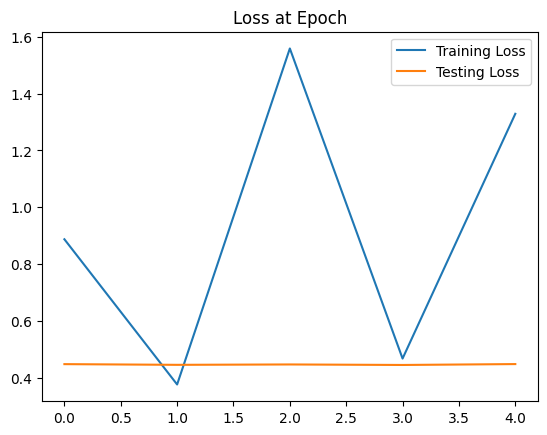

In [72]:
# GRAPH THE LOSS AT EPOCH
train_losses = [t1.item() for t1 in train_losses]
test_losses = [t1.item() for t1 in test_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Loss at Epoch')
plt.legend()

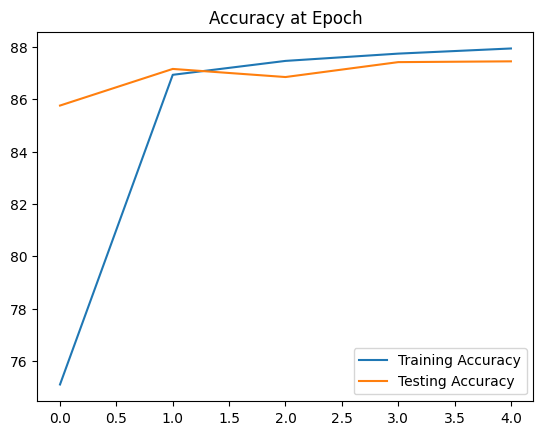

In [73]:
# graph the accurancy at the end of each epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Testing Accuracy")
plt.title("Accuracy at Epoch")
plt.legend()

In [75]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [76]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()

In [77]:
# Did for corrrect
correct.item()/len(test_data)*100


87.45

**SEND NEW IMAGE THRU THE MODEL - VIDEO 19**

In [78]:
# Grab an images with number in the image
test_data[4111]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [79]:
# Grab an image without number in the image or without label
test_data[4143][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [80]:
#Reshape it
test_data[4143][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

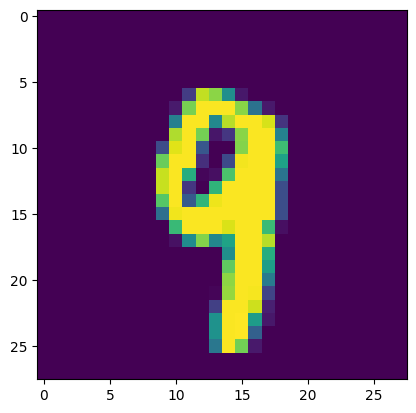

In [81]:
# Show the image
plt.imshow(test_data[4143][0].reshape(28,28))

In [82]:
# Pass the image to the model
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28x28 image


In [83]:
# Check the new prediction.. get proability
new_prediction

tensor([[-1.9952e+01, -1.9952e+01, -1.9952e+01, -1.7135e+01, -7.0726e+00,
         -1.8772e+01, -1.9952e+01, -1.2943e+01, -1.1447e+01, -8.6163e-04,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01, -1.9952e+01,
         -1.9952e+01, -1.9952e+01, -1.

In [84]:
new_prediction.argmax()

tensor(9)

Let's go through the code line by line, explaining every detail, including the parameters, numbers, and the purpose behind each part. I'll also explain CNNs and how they differ from simple neural networks.

### Introduction to CNN vs. Simple Neural Networks

- **Simple Neural Network (Fully Connected Neural Network):**
  - A simple neural network consists of layers where each neuron is connected to every neuron in the next layer. This is known as a fully connected layer. These networks are powerful for tasks where the data doesn't have a specific structure, but they struggle with images because they don't capture spatial hierarchies (like edges, textures, etc.) in images.

- **Convolutional Neural Network (CNN):**
  - CNNs are designed to process data that has a grid-like structure, such as images. Instead of connecting every neuron to every other neuron, CNNs use convolutional layers that apply filters to small patches of the image. This allows CNNs to capture spatial features like edges and textures, making them more effective for image-related tasks.

### Detailed Explanation of the Code

#### Importing and Starting the Timer

```python
import time
start_time = time.time()
```

- **What it does:**
  - Imports the `time` module, which is used to track how long the training process takes.
  - `start_time = time.time()` records the current time when the training starts. This will be used later to calculate the total training time.

#### Initialize Variables to Track Progress

```python
epochs = 5
train_losses = []
train_correct = []
test_losses = []
test_correct = []
```

- **What it does:**
  - `epochs = 5`: Specifies that the model will go through the entire training dataset 5 times.
  - `train_losses = []`: An empty list to store the loss values during training after each epoch.
  - `train_correct = []`: An empty list to track the number of correct predictions on the training data for each epoch.
  - `test_losses = []`: An empty list to store the loss values during testing after each epoch.
  - `test_correct = []`: An empty list to track the number of correct predictions on the test data for each epoch.

#### Training and Testing Loop

```python
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0
```

- **What it does:**
  - `for i in range(epochs)`: Starts a loop that will iterate `epochs` times (5 in this case). Each iteration corresponds to one full pass through the training dataset.
  - `trn_corr = 0`: Initializes a variable to count the correct predictions in the training set during the current epoch.
  - `tst_corr = 0`: Initializes a variable to count the correct predictions in the test set during the current epoch.

#### Training the Model

```python
for b, (X_train, y_train) in enumerate(train_loader):
  b +=1  # start our batches at 1
  y_pred = model(X_train)  # get predicted values from the training set. Not FLATTENED, ITS 2D
  loss = criterion(y_pred, y_train)  # compare the predicted
```

- **What it does:**
  - `for b, (X_train, y_train) in enumerate(train_loader)`: Loops through the training data in batches. `b` is the batch number, `X_train` is the batch of input images, and `y_train` is the corresponding batch of labels.
  - `b += 1`: Starts batch numbering from 1 instead of 0 (optional, just for display purposes).
  - `y_pred = model(X_train)`: Passes the batch of images through the model to get the predicted outputs. Since it's CNN, it processes the 2D image data directly.
  - `loss = criterion(y_pred, y_train)`: Calculates the loss by comparing the predicted labels (`y_pred`) with the actual labels (`y_train`) using the loss function (criterion).

#### Calculating and Tracking Correct Predictions

```python
predicted = torch.max(y_pred.data, 1)[1]  # add up the number of correct predictions.
batch_corr = (predicted == y_train).sum() # how many we got correct from this batch.
trn_corr += batch_corr  # keep track as we go along in training
```

- **What it does:**
  - `predicted = torch.max(y_pred.data, 1)[1]`: Finds the index of the maximum value in the predictions for each image in the batch, which corresponds to the predicted class.
  - `batch_corr = (predicted == y_train).sum()`: Compares the predicted classes with the actual classes (`y_train`) and sums up the number of correct predictions in the current batch.
  - `trn_corr += batch_corr`: Adds the number of correct predictions from this batch to the running total for the current epoch.

#### Updating Model Parameters

```python
optimizer.zero_grad()
loss.backward()
optimizer.step()
```

- **What it does:**
  - `optimizer.zero_grad()`: Resets the gradients to zero. This is important because, by default, gradients accumulate after every `backward()` call.
  - `loss.backward()`: Computes the gradients of the loss with respect to the model's parameters. These gradients are then used to update the parameters.
  - `optimizer.step()`: Updates the model's parameters using the gradients calculated by `loss.backward()` and the learning rate defined in the optimizer.

#### Printing Progress

```python
if b%600 == 0:
  print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')
```

- **What it does:**
  - `if b%600 == 0`: Checks if the current batch number `b` is a multiple of 600. This is just an arbitrary choice to print progress every 600 batches.
  - `print(f'Epoch: {i}  Batch: {b}  Loss: {loss.item()}')`: Prints the current epoch, batch number, and loss value.

#### Storing Results

```python
train_losses.append(loss)
train_correct.append(trn_corr)
```

- **What it does:**
  - `train_losses.append(loss)`: Adds the current loss value to the `train_losses` list after each epoch.
  - `train_correct.append(trn_corr)`: Adds the total number of correct predictions in the training set to the `train_correct` list after each epoch.

#### Testing the Model

```python
with torch.no_grad():
  for b, (X_test, y_test) in enumerate(test_loader):
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    tst_corr += (predicted == y_test).sum()
```

- **What it does:**
  - `with torch.no_grad()`: Disables gradient calculation because we don't want to update the model during testing. This makes testing faster and reduces memory usage.
  - `for b, (X_test, y_test) in enumerate(test_loader)`: Loops through the test data in batches, just like in training.
  - `y_val = model(X_test)`: Passes the test images through the model to get predictions.
  - `predicted = torch.max(y_val.data, 1)[1]`: Finds the predicted class for each image.
  - `tst_corr += (predicted == y_test).sum()`: Sums up the number of correct predictions for the test set.

#### Storing Test Results

```python
loss = criterion(y_val, y_test)
test_losses.append(loss)
test_correct.append(tst_corr)
```

- **What it does:**
  - `loss = criterion(y_val, y_test)`: Calculates the loss on the test set.
  - `test_losses.append(loss)`: Adds the test loss to the `test_losses` list after each epoch.
  - `test_correct.append(tst_corr)`: Adds the number of correct predictions on the test set to `test_correct` after each epoch.

#### Calculate and Print Total Training Time

```python
current_time = time.time()
total = current_time - start_time
print(f"Training Took: {total/60} minutes!")
```

- **What it does:**
  - `current_time = time.time()`: Gets the current time after training is done.
  - `total = current_time - start_time`: Calculates the total time spent training by subtracting the start time from the current time.
  - `print(f"Training Took: {total/60} minutes!")`: Converts the total time from seconds to minutes and prints it.

### Plotting Results

#### Plotting Loss

```python
train_losses = [t1.item() for t1 in train_losses]
test_losses = [t1.item() for t1 in test_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Loss at Epoch')
plt.legend()
```

- **What it does:**
  - `train_losses = [t1.item() for t1 in train_losses]`: Converts the training losses from tensors to simple numbers (floats) that can be plotted.
  - `test_losses = [t1.item() for t1 in test_losses]`: Similarly converts test losses to floats.
  - `plt.plot(train_losses, label='Training Loss')`: Plots the training loss over each epoch.
  - `plt.plot(test_losses, label='Testing Loss')`: Plots the test loss over each epoch.
  - `plt.title('Loss at Epoch')`: Sets the title of the plot.
  - `plt.legend()`: Adds a

 legend to the plot to distinguish between training and testing loss.

#### Plotting Accuracy

```python
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Testing Accuracy")
plt.title("Accuracy at Epoch")
plt.legend()
```

- **What it does:**
  - `plt.plot([t/600 for t in train_correct], label="Training Accuracy")`: Plots the training accuracy over each epoch. Divides by 600 because that's the number of batches.
  - `plt.plot([t/100 for t in test_correct], label="Testing Accuracy")`: Plots the test accuracy over each epoch. Divides by 100 for the same reason.
  - `plt.title("Accuracy at Epoch")`: Sets the title of the plot.
  - `plt.legend()`: Adds a legend to the plot to distinguish between training and testing accuracy.

#### Checking Model Accuracy on Entire Test Set

```python
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)
```

- **What it does:**
  - `test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)`: Loads the entire test set in one batch (batch size of 10,000) without shuffling. This is useful for calculating overall accuracy.

```python
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()
```

- **What it does:**
  - `with torch.no_grad()`: Again, disables gradient calculation.
  - `correct = 0`: Initializes a counter for the correct predictions.
  - `for X_test, y_test in test_load_everything`: Loops through the entire test set.
  - `y_val = model(X_test)`: Passes the test images through the model.
  - `predicted = torch.max(y_val.data, 1)[1]`: Gets the predicted classes.
  - `correct += (predicted == y_test).sum()`: Sums up the number of correct predictions.

```python
correct.item()/len(test_data)*100
```

- **What it does:**
  - `correct.item()/len(test_data)*100`: Calculates the percentage of correct predictions on the test set.

### Sending New Images Through the Model

#### Loading and Reshaping Images

```python
test_data[4111]
test_data[4143][0]
test_data[4143][0].reshape(28,28)
plt.imshow(test_data[4143][0].reshape(28,28))
```

- **What it does:**
  - `test_data[4111]`: Accesses the image at index 4111 from the test set.
  - `test_data[4143][0]`: Accesses the image at index 4143. The `[0]` is used to get the image itself, excluding the label.
  - `test_data[4143][0].reshape(28,28)`: Reshapes the image back to its original 28x28 format.
  - `plt.imshow(test_data[4143][0].reshape(28,28))`: Displays the image using Matplotlib.

#### Passing the Image Through the Model

```python
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4143][0].view(1,1,28,28)) # batch size of 1, 1 color channel, 28x28 image
```

- **What it does:**
  - `model.eval()`: Puts the model in evaluation mode, meaning it won't update any weights or biases during this process.
  - `with torch.no_grad()`: Disables gradient calculations.
  - `new_prediction = model(test_data[4143][0].view(1,1,28,28))`: Passes the image through the model after reshaping it to fit the model's expected input format: 1 image, 1 color channel, and 28x28 pixels.

#### Checking the Prediction

```python
new_prediction
new_prediction.argmax()
```

- **What it does:**
  - `new_prediction`: The raw output of the model, which contains the predicted scores for each class.
  - `new_prediction.argmax()`: Finds the index of the highest score, which corresponds to the predicted digit.

### Summary

This code performs the training and testing of a Convolutional Neural Network (CNN) on the MNIST dataset, tracks its performance, and even allows for testing on new images. CNNs are specifically effective for image data because they capture spatial features, making them superior to simple neural networks for tasks like image classification. Every line in the code plays a crucial role, from data preprocessing to model evaluation, ensuring that the model learns and makes accurate predictions.

The method `t1.item()` is used in PyTorch to extract the value of a single-element tensor as a standard Python number (e.g., a float or int). In the context of your code, `t1` represents a tensor object that contains the loss value after each epoch. By using `t1.item()`, you convert this tensor to a regular Python number, which is necessary for plotting and further calculations.

### Detailed Explanation

- **Tensor in PyTorch:**
  - In PyTorch, data (like loss values) is often stored in a structure called a `tensor`, which is similar to a NumPy array but with additional functionality, like GPU acceleration.

- **Single-Element Tensor:**
  - After the loss is calculated (using the criterion function), it is stored as a tensor with a single element. For example, if the loss is `0.035`, the tensor might look like `tensor(0.035)`.

- **Using `.item()`:**
  - The `.item()` method is called on this single-element tensor to convert it into a Python scalar (e.g., `0.035`). This makes it easier to handle in standard Python operations like plotting.

### Example Output

Let’s consider the loss value after an epoch is stored as a tensor:

```python
loss = tensor(0.035)  # A single-element tensor
```

- Without using `.item()`, `loss` is still a tensor:

```python
print(loss)
# Output: tensor(0.035)
```

- Using `.item()`:

```python
loss_value = loss.item()
print(loss_value)
# Output: 0.035
```

- In your code:

```python
train_losses = [t1.item() for t1 in train_losses]
```

This line of code iterates over all the loss tensors stored in `train_losses`, converts each one to a Python float, and stores the resulting list of floats in `train_losses`.

### Purpose in the Code

- **Why use `.item()`?**
  - Plotting libraries like Matplotlib expect standard Python data types (like floats or ints) rather than PyTorch tensors. The `item()` method ensures that the data is in the correct format for plotting.

- **What happens without `.item()`?**
  - If you don’t convert the tensors to floats, you may encounter errors when trying to plot or manipulate these values with standard Python libraries. Even if it doesn't throw an error, the plot might not behave as expected.

In summary, `t1.item()` is used to convert the loss tensor into a Python number, making it suitable for plotting and further calculations.